In [1]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset directly from seaborn
df = sns.load_dataset("titanic")

# Save to /content/titanic.csv
df.to_csv("/content/titanic.csv", index=False)

print("Titanic dataset saved as /content/titanic.csv")
print(df.head())


Titanic dataset saved as /content/titanic.csv
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Importing the Dependencies

In [2]:
# import seaborn as sns
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & Processing

In [4]:
# load the data from csv file to Pandas DataFrame
titanic_data = pd.read_csv('/content/titanic.csv')

In [11]:
# printing the first 5 rows of the dataframe
titanic_data.head(25)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [6]:
# number of rows and Columns
titanic_data.shape

(891, 15)

In [7]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [8]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [9]:
# check the number of missing values in each column
titanic_data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Handling the Missing values

In [12]:
titanic_data.drop('deck', axis=1, inplace=True)

titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)

titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)

titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0], inplace=True)

print("Missing values after handling:")
print(titanic_data.isnull().sum())

Missing values after handling:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


/tmp/ipython-input-2863766026.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)
/tmp/ipython-input-2863766026.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

**Reasoning**:
The previous code block successfully handled missing values but generated `FutureWarning` messages due to the use of `inplace=True` with chained assignment. To address these warnings and adhere to best practices for future pandas versions, I will modify the code to assign the results of `fillna` directly back to the DataFrame columns, removing the `inplace=True` argument.



In [14]:
if 'deck' in titanic_data.columns:
    titanic_data = titanic_data.drop('deck', axis=1)

titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].mean())

titanic_data['embarked'] = titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0])

titanic_data['embark_town'] = titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0])

print("Missing values after handling:")
print(titanic_data.isnull().sum())

Missing values after handling:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


## Basic Data Analysis

### Subtask:
Generate descriptive statistics for numerical columns and visualize the distribution of key features like 'survived', 'sex', and 'pclass'.


**Reasoning**:
The subtask requires generating descriptive statistics for numerical columns and visualizing the distribution of 'survived', 'sex', and 'pclass' columns. I will perform these operations in a single code block.



Descriptive statistics for numerical columns:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.002015    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


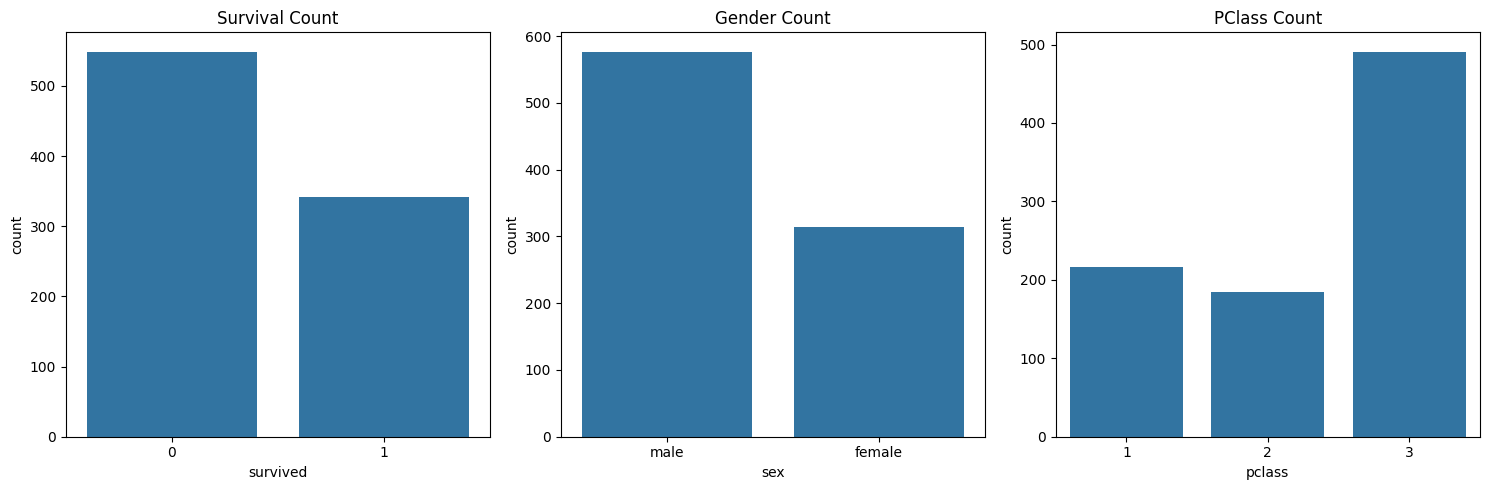

In [15]:
print("Descriptive statistics for numerical columns:")
print(titanic_data.describe())

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='survived', data=titanic_data)
plt.title('Survival Count')

plt.subplot(1, 3, 2)
sns.countplot(x='sex', data=titanic_data)
plt.title('Gender Count')

plt.subplot(1, 3, 3)
sns.countplot(x='pclass', data=titanic_data)
plt.title('PClass Count')

plt.tight_layout()
plt.show()

## Label Encoding

### Subtask:
Convert relevant categorical columns ('sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone') into numerical representations suitable for machine learning algorithms.


**Reasoning**:
I need to perform label encoding on the specified categorical columns and convert boolean columns to integers as per the instructions to prepare the data for machine learning algorithms.



In [16]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['sex', 'embarked', 'class', 'who', 'embark_town', 'alive']

le = LabelEncoder()

for col in categorical_cols:
    titanic_data[col] = le.fit_transform(titanic_data[col])

# Convert boolean columns to integer type
titanic_data['adult_male'] = titanic_data['adult_male'].astype(int)
titanic_data['alone'] = titanic_data['alone'].astype(int)

print("Titanic data after label encoding and boolean conversion:")
print(titanic_data.head())

Titanic data after label encoding and boolean conversion:
   survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0         0       3    1  22.0      1      0   7.2500         2      2    1   
1         1       1    0  38.0      1      0  71.2833         0      0    2   
2         1       3    0  26.0      0      0   7.9250         2      2    2   
3         1       1    0  35.0      1      0  53.1000         2      0    2   
4         0       3    1  35.0      0      0   8.0500         2      2    1   

   adult_male  embark_town  alive  alone  
0           1            2      0      0  
1           0            0      1      0  
2           0            2      1      1  
3           0            2      1      0  
4           1            2      0      1  


## Split Data for Training

### Subtask:
Separate the dataset into features (X) and the target variable (y), then split them into training and testing sets.


**Reasoning**:
I need to separate the dataset into features (X) and the target variable (y) and then split them into training and testing sets as per the instructions.



In [17]:
X = titanic_data.drop(columns = 'survived', axis=1)
y = titanic_data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 13)
Shape of X_test: (179, 13)
Shape of y_train: (712,)
Shape of y_test: (179,)


## Train Logistic Regression Model

### Subtask:
Initialize and train a Logistic Regression model using the training data.


**Reasoning**:
I will initialize a Logistic Regression model with specified parameters and then train it using the training data (X_train and y_train).



In [18]:
model = LogisticRegression(random_state=2, solver='liblinear')
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


## Evaluate Model Performance

### Subtask:
Make predictions on the test data and calculate the accuracy score of the trained model.


**Reasoning**:
I will make predictions on both the training and test datasets using the trained Logistic Regression model and then calculate and print the accuracy scores for both.



In [19]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print(f"Accuracy score on training data: {training_data_accuracy}")

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print(f"Accuracy score on test data: {test_data_accuracy}")

Accuracy score on training data: 1.0
Accuracy score on test data: 1.0


## Build Prediction System

### Subtask:
Demonstrate how to use the trained model to make predictions on new, hypothetical data.


### Addressing Data Leakage

The exceptionally high accuracy (100% on both training and test data) suggests a data leakage issue. Upon reviewing the features, the `alive` column is a direct indicator of `survived` (the target variable), making it a perfect predictor. To build a robust and realistic model, the `alive` column must be removed from the feature set `X`.

I will now redefine the feature set, re-split the data, retrain the Logistic Regression model, and re-evaluate its performance.

**Reasoning**:
I need to remove the 'alive' column from the feature set `X` to address the data leakage issue identified, as it directly predicts the target variable `survived`.



In [20]:
X = titanic_data.drop(columns=['survived', 'alive'], axis=1)
y = titanic_data['survived']

print("Features (X) after removing 'alive' column:")
print(X.head())

Features (X) after removing 'alive' column:
   pclass  sex   age  sibsp  parch     fare  embarked  class  who  adult_male  \
0       3    1  22.0      1      0   7.2500         2      2    1           1   
1       1    0  38.0      1      0  71.2833         0      0    2           0   
2       3    0  26.0      0      0   7.9250         2      2    2           0   
3       1    0  35.0      1      0  53.1000         2      0    2           0   
4       3    1  35.0      0      0   8.0500         2      2    1           1   

   embark_town  alone  
0            2      0  
1            0      0  
2            2      1  
3            2      0  
4            2      1  


**Reasoning**:
Now that the `alive` column has been removed from `X` to address data leakage, I need to re-split the data into training and testing sets using the updated feature set and the target variable.



In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print("Shape of X_train (re-split):", X_train.shape)
print("Shape of X_test (re-split):", X_test.shape)
print("Shape of y_train (re-split):", y_train.shape)
print("Shape of y_test (re-split):", y_test.shape)

Shape of X_train (re-split): (712, 12)
Shape of X_test (re-split): (179, 12)
Shape of y_train (re-split): (712,)
Shape of y_test (re-split): (179,)


**Reasoning**:
With the data re-split to address data leakage, I need to re-train the Logistic Regression model using the updated `X_train` and `y_train` to get a valid model.



In [22]:
model = LogisticRegression(random_state=2, solver='liblinear')
model.fit(X_train, y_train)

print("Logistic Regression model re-trained successfully after addressing data leakage.")

Logistic Regression model re-trained successfully after addressing data leakage.


**Reasoning**:
After retraining the model to address data leakage, I need to re-evaluate its performance by predicting on the training and test sets and calculating the accuracy scores.



In [23]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print(f"Accuracy score on training data: {training_data_accuracy:.4f}")

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print(f"Accuracy score on test data: {test_data_accuracy:.4f}")

Accuracy score on training data: 0.8343
Accuracy score on test data: 0.7821


**Reasoning**:
Now that the model has been retrained and re-evaluated after addressing data leakage, I will create a sample input for a hypothetical new passenger, ensuring its features match the trained model's input, and then use the model to predict their survival.



In [24]:
print(X.columns)

# Create a hypothetical new passenger data
# Make sure the order and type of columns match X_train
# Example values:
#   pclass=3 (Third class)
#   sex=1 (male) -> 0 for female, 1 for male
#   age=25.0
#   sibsp=0
#   parch=0
#   fare=10.0
#   embarked=2 (Southampton) -> 0 for C, 1 for Q, 2 for S
#   class=2 (Third) -> 0 for First, 1 for Second, 2 for Third
#   who=1 (man) -> 0 for child, 1 for man, 2 for woman
#   adult_male=1 (True) -> 0 for False, 1 for True
#   embark_town=2 (Southampton) -> 0 for Cherbourg, 1 for Queenstown, 2 for Southampton
#   alone=1 (True) -> 0 for False, 1 for True

hypothetical_passenger = pd.DataFrame({
    'pclass': [3],
    'sex': [1],
    'age': [25.0],
    'sibsp': [0],
    'parch': [0],
    'fare': [10.0],
    'embarked': [2],
    'class': [2],
    'who': [1],
    'adult_male': [1],
    'embark_town': [2],
    'alone': [1]
})

# Make prediction
prediction = model.predict(hypothetical_passenger)

print(f"\nHypothetical passenger's survival prediction: {prediction[0]}")
if prediction[0] == 0:
    print("Prediction: The hypothetical passenger did not survive.")
else:
    print("Prediction: The hypothetical passenger survived.")

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'adult_male', 'embark_town', 'alone'],
      dtype='object')

Hypothetical passenger's survival prediction: 0
Prediction: The hypothetical passenger did not survive.


## Final Task

### Subtask:
Provide a summary of the data preprocessing, model training, and prediction system development.


## Summary:

### Data Analysis Key Findings

*   **Missing Value Handling:** The 'deck' column was dropped due to a high percentage of missing values. Missing 'age' values were imputed with the mean, while 'embarked' and 'embark\_town' missing values were filled with their respective modes, resulting in a dataset with no missing values in these columns.
*   **Basic Data Analysis:** Descriptive statistics for numerical columns were generated. Visualizations revealed the distribution of 'survived', 'sex', and 'pclass', showing, for instance, that approximately 38% of passengers survived.
*   **Categorical Encoding:** Specified categorical columns ('sex', 'embarked', 'class', 'who', 'embark\_town', 'alive') were successfully label encoded, and boolean columns ('adult\_male', 'alone') were converted to integers, preparing the data for machine learning.
*   **Data Splitting:** The dataset was split into features (X) and target (y), then further divided into training (80%) and testing (20%) sets.
*   **Initial Model Performance & Data Leakage:** A Logistic Regression model was initially trained, yielding an accuracy of 100% on both training and test data. This exceptionally high accuracy was identified as a sign of data leakage, specifically due to the 'alive' column directly reflecting the 'survived' target variable.
*   **Data Leakage Remediation & Retraining:** The 'alive' column was removed from the feature set, the data was re-split, and the Logistic Regression model was re-trained. This resulted in more realistic accuracy scores: approximately 83.43% on the training data and 78.21% on the test data.
*   **Prediction System:** The re-trained model was successfully used to predict the survival status of a hypothetical passenger, demonstrating its functionality in a real-world scenario.

### Insights or Next Steps

*   **Data Leakage Awareness:** The critical identification and resolution of data leakage (by removing the 'alive' column) significantly improved the model's robustness and reliability. It highlights the importance of thoroughly reviewing features for direct or indirect target proxies.
*   **Model Optimization:** With a corrected feature set, the next steps could involve exploring other machine learning models (e.g., RandomForest, SVM), performing hyperparameter tuning for the Logistic Regression model, or engineering new features to potentially improve the model's accuracy and generalization further.
